# Visualizing the HathiTrust Library with Tree-SNE

We use the tree-SNE algorithm to visualize 100,000 works in the English language randomly selected from the HathiTrust l
Library's collection. This code is based on [this notebook](https://github.com/berenslab/finer-tsne/blob/master/heavy-tailed-tsne.ipynb) accompanying the paper ["Heavy-tailed kernels reveal a finer cluster structure in t-SNE"](https://arxiv.org/pdf/1902.05804) by Kobak et al.

We begin by importing the necessary dependencies.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

from tqdm import tqdm
from tree_sne import TreeSNE

import pylab as plt
import seaborn as sns
sns.set_style('ticks')

## Optional: Import entire HathiTrust Library.

To reproduce the figures in xxxxx, this step is not necessary. Instead, skip to Step 1.

Data files can be downloaded from [here.](https://zenodo.org/record/1477018) Note that there is one record in the collection that contains the incorrect number of fields - we choose to simply ignore this record.

In [2]:
meta = pd.read_csv('hathi-data/hathi.tsv', sep='\t', on_bad_lines='warn')

/var/folders/jz/8fhddjfs511ft88s4zg_y4qr0000gn/T/ipykernel_87345/3018462897.py:1: ParserWarning: Skipping line 12799837: expected 8 fields, saw 9

  meta = pd.read_csv('hathi-data/hathi.tsv', sep='\t', on_bad_lines='warn')


Now, we select a random subset of English language works in the collection. For reproducibility, this data is saved in a pickle file.

In [ ]:
ids = np.array(meta['id'])[np.array(meta['language'])=='English']
idsRandom = np.random.choice(ids, size=1000000)

eng1m = meta.loc[meta['id'].isin(idsRandom)]
eng1m.to_pickle('hathi-data/eng-1m-meta.pkl')

TODO: Add in description of model, etc.

In [7]:
from gensim.models.keyedvectors import KeyedVectors
model = KeyedVectors.load_word2vec_format('hathi-data/hathi_pca.bin', binary=True)

We save the model for our random subset of works in an npy file for reproducibility.

In [ ]:
X = np.zeros((idsRandom.size, 100))
for i,ident in tqdm(enumerate(idsRandom)):
    X[i,:] = model[ident]
    
print(X.shape)
np.save('hathi-data/english-1m.npy', X)

1000000it [43:02, 387.23it/s]


(1000000, 100)


## Step 1: Import data and load vector model.

In [3]:
meta = pd.read_pickle('hathi-data/eng-1m-meta.pkl')
X = np.load('hathi-data/english-1m.npy')
X = X[:100000]

X.shape

(100000, 100)

## Step 2: Initialize tree-SNE

In [4]:
treeSNE = TreeSNE(X, 2, 0.01, 50)

Find the tree-SNE embeddings. This takes a while!

In [17]:
treeSNE.fit()

=============== t-SNE v1.2.1 ===============
fast_tsne data_path: data_2025-09-23 16:46:42.113611-927590639.dat
fast_tsne result_path: result_2025-09-23 16:46:42.113611-927590639.dat
fast_tsne nthreads: 4
Read the following parameters:
	 n 100000 by d 100 dataset, theta 0.500000,
	 perplexity 316.227766, no_dims 2, max_iter 750,
	 stop_lying_iter 250, mom_switch_iter 250,
	 momentum 0.500000, final_momentum 0.800000,
	 learning_rate 8333.333333, max_step_norm 5.000000,
	 K -1, sigma -1.000000, nbody_algo 2,
	 knn_algo 1, early_exag_coeff 12.000000,
	 no_momentum_during_exag 0, n_trees 50, search_k 47400,
	 start_late_exag_iter 250, late_exag_coeff 12.000000
	 nterms 3, interval_per_integer 1.000000, min_num_intervals 50, t-dist df 1.000000
Read the 100000 x 100 data matrix successfully. X[0,0] = 0.428931
Read the initialization successfully.
Will use momentum during exaggeration phase
Computing input similarities...
Using perplexity, so normalizing input data (to prevent numerical prob

In [ ]:
fits = treeSNE.fits
#np.save('hathi-data/english-100k-fits.npy', fits)

## Step 3: Create the visualization

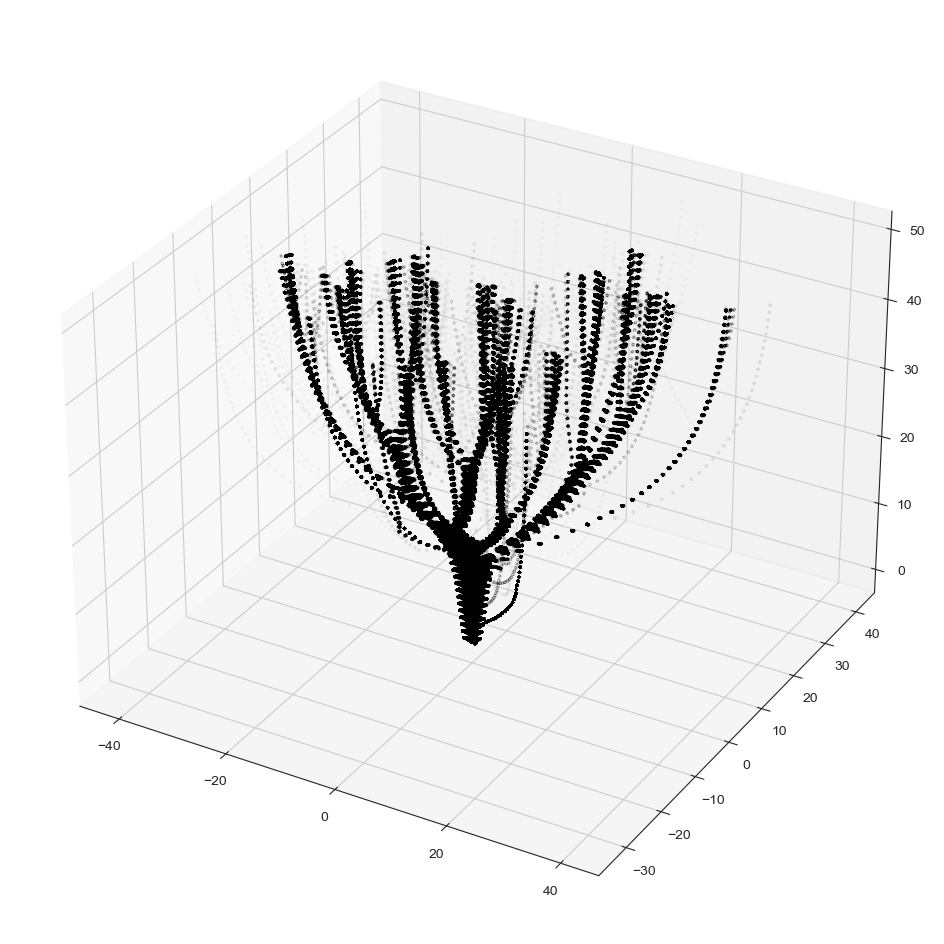

In [ ]:
treeSNE.visualize()

## Step 4: Further Analysis